In [53]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.stats import linregress
import seaborn as sns
from matplotlib import cm

suite_names = ["SymphonyLMC", "SymphonyMilkyWay", "SymphonyGroup", "SymphonyLCluster", "SymphonyCluster"]
sim_colors = {
        "SymphonyLMC": sns.color_palette("colorblind")[4],
        "SymphonyMilkyWay": sns.color_palette("colorblind")[0],
        "SymphonyGroup": sns.color_palette("colorblind")[2],
        "SymphonyLCluster": sns.color_palette("colorblind")[1],
        "SymphonyCluster": sns.color_palette("colorblind")[3],
    }
sim_names = {
        "SymphonyLMC": "LMC",
        "SymphonyMilkyWay": "Milky~Way",
        "SymphonyGroup": "Group",
        "SymphonyLCluster": "L-Cluster",
        "SymphonyCluster": "Cluster",
    }


/var/folders/ws/425czmvd4jn8yf9hxr3xtk880000gn/T/ipykernel_61468/1001117117.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Reds")  # choose any colormap
/var/folders/ws/425czmvd4jn8yf9hxr3xtk880000gn/T/ipykernel_61468/1001117117.py:50: RuntimeWarning: Mean of empty slice
  mean_over_suites = np.nanmean(all_suites_interp, axis=0)
/Users/fengbocheng/PythonEnvs/Astronomy/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/var/folders/ws/425czmvd4jn8yf9hxr3xtk880000gn/T/ipykernel_61468/1001117117.py:50: RuntimeWarning: Mean of empty slice
  mean_over_suites = np.nanmean(all_suites_interp, axis=0)
/Users/fengbocheng/PythonEnvs/Astronomy/lib/python3.13/site-package

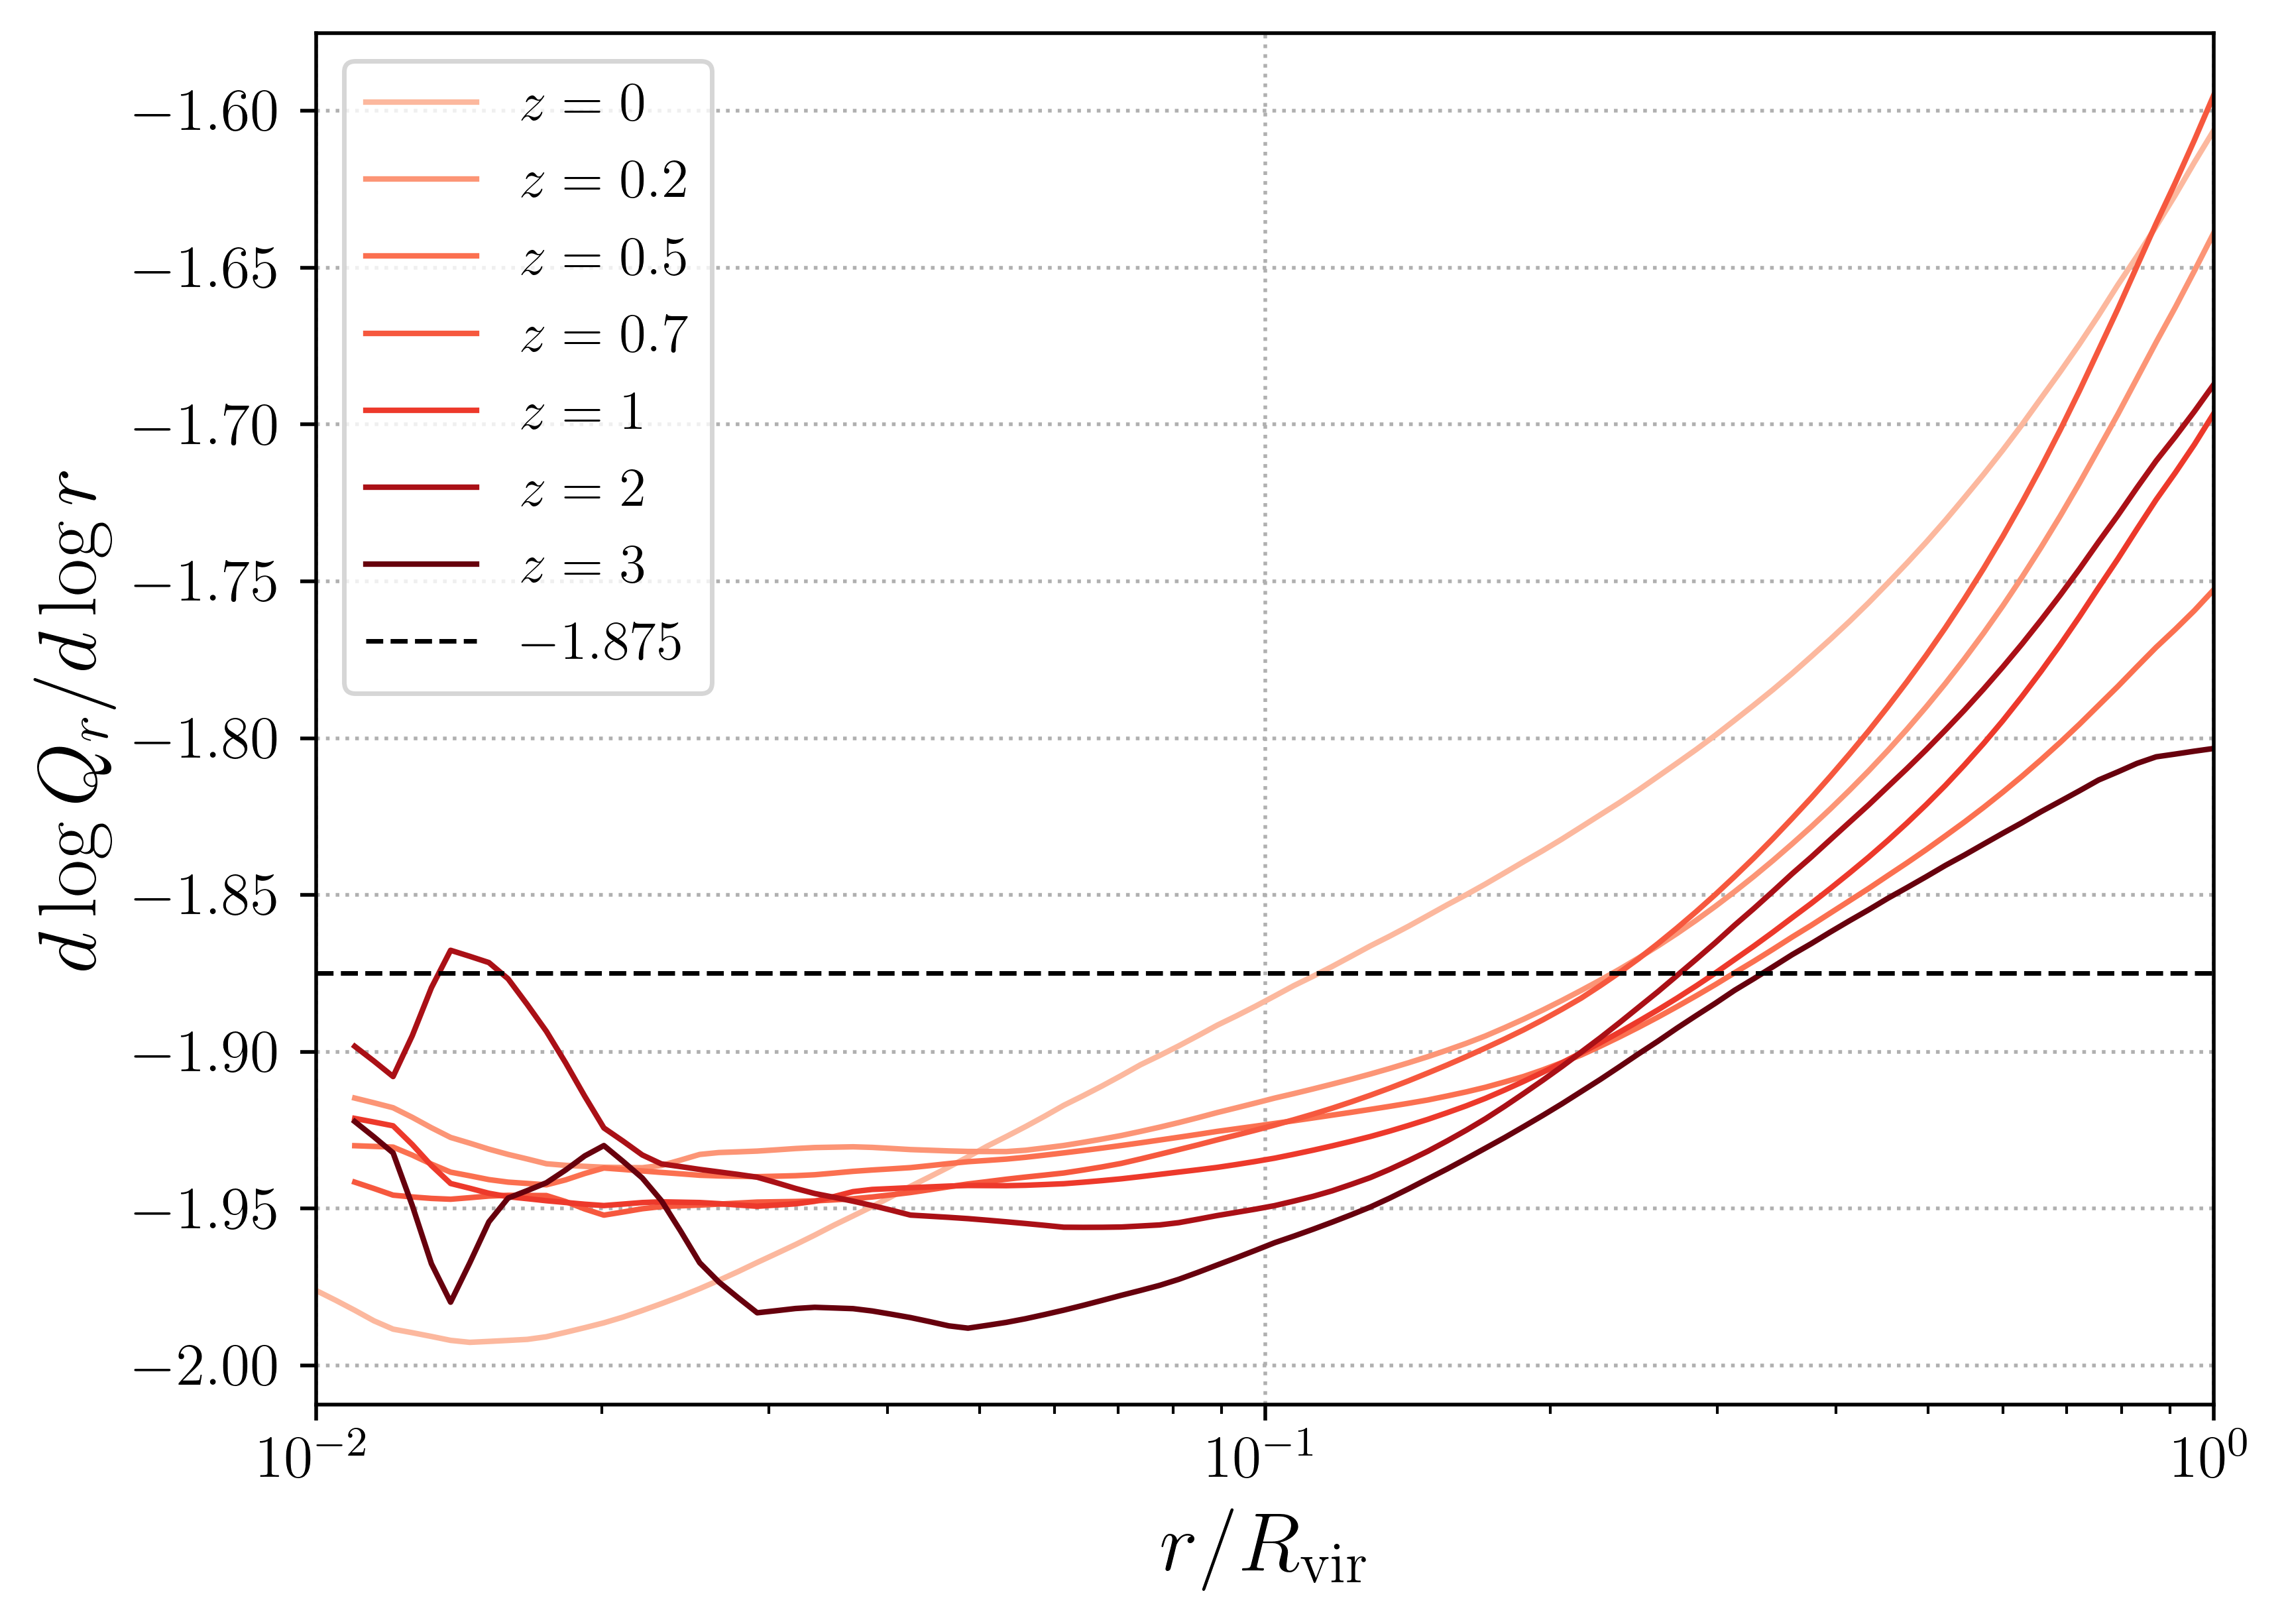

In [62]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import matplotlib.cm as cm

# Parameters
redshifts = [0, 0.2, 0.5, 0.7, 1, 2, 3]
base_dir_root = '/Users/fengbocheng/Projects/Symphony-PPSD/output'
plot_range = [1e-2, 1]

# Use sqrt normalization to make low-z colors darker
norm_redshifts = np.sqrt((np.array(redshifts)+0.2 - min(redshifts)) / (max(redshifts) - min(redshifts)))
cmap = cm.get_cmap("Reds")  # choose any colormap

def ppsd_slope_evolution():
    plt.rcParams["text.usetex"] = True
    fig, ax = plt.subplots(1, 1, figsize=(7, 5), dpi=500)

    # Define a common radial grid (log-spaced)
    r_common = np.logspace(np.log10(plot_range[0]), np.log10(plot_range[1]), 100)

    for i, z in enumerate(redshifts):
        base_dir = os.path.join(base_dir_root, f"z_{z}")
        all_suites_interp = []

        for suite in suite_names:
            radius_dir = os.path.join(base_dir, "data", suite, "ppsd_slope_profiles_r")
            if not os.path.isdir(radius_dir):
                continue

            files = sorted([f for f in os.listdir(radius_dir) if f.endswith(".csv")])
            if not files:
                continue

            # Load radius and slope_Qr
            r = pd.read_csv(os.path.join(radius_dir, files[0]))["r_scaled"].values
            slope_Qr = np.array([pd.read_csv(os.path.join(radius_dir, f))["slope_Q_r"].values for f in files])
            slope_mean_Qr = np.nanmean(slope_Qr, axis=0)

            # Interpolate to common grid
            f_interp = interp1d(r, slope_mean_Qr, kind="linear", bounds_error=False, fill_value=np.nan)
            slope_interp = f_interp(r_common)
            all_suites_interp.append(slope_interp)

        # Average across all suites at this z
        if all_suites_interp:
            all_suites_interp = np.vstack(all_suites_interp)
            mean_over_suites = np.nanmean(all_suites_interp, axis=0)
            std_over_suites = np.nanstd(all_suites_interp, axis=0)

            # Pick color based on sqrt-normalized redshift
            color = cmap(norm_redshifts[i])

            # Plot mean with scatter shading
            ax.plot(r_common, mean_over_suites, lw=1.2, color=color, label=rf"$z={z}$")
            #ax.fill_between(r_common, mean_over_suites - std_over_suites, mean_over_suites + std_over_suites,alpha=0.2, color=color)

    # Format axes
    ax.set_xlabel(r"$r / R_{\mathrm{vir}}$", fontsize=18)
    ax.set_ylabel(r"$d\log Q_r / d\log r$", fontsize=18)
    ax.set_xscale("log")
    ax.axhline(-1.875, ls="--", color="black", lw=1, label=r"$-1.875$")
    ax.set_xlim(plot_range)
    ax.legend(fontsize=12, loc="best", frameon=True)
    ax.grid(True, which="major", linestyle=":")
    plt.tick_params(axis='both', labelsize=13)
    fig.tight_layout()
    plt.show()

# Run
ppsd_slope_evolution()

/var/folders/ws/425czmvd4jn8yf9hxr3xtk880000gn/T/ipykernel_61468/969252774.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Reds")
/var/folders/ws/425czmvd4jn8yf9hxr3xtk880000gn/T/ipykernel_61468/969252774.py:53: RuntimeWarning: Mean of empty slice
  mean_over_suites = np.nanmean(all_suites_interp, axis=0)
/Users/fengbocheng/PythonEnvs/Astronomy/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/var/folders/ws/425czmvd4jn8yf9hxr3xtk880000gn/T/ipykernel_61468/969252774.py:53: RuntimeWarning: Mean of empty slice
  mean_over_suites = np.nanmean(all_suites_interp, axis=0)
/Users/fengbocheng/PythonEnvs/Astronomy/lib/python3.13/site-packages/numpy/lib/_nanfunctions_

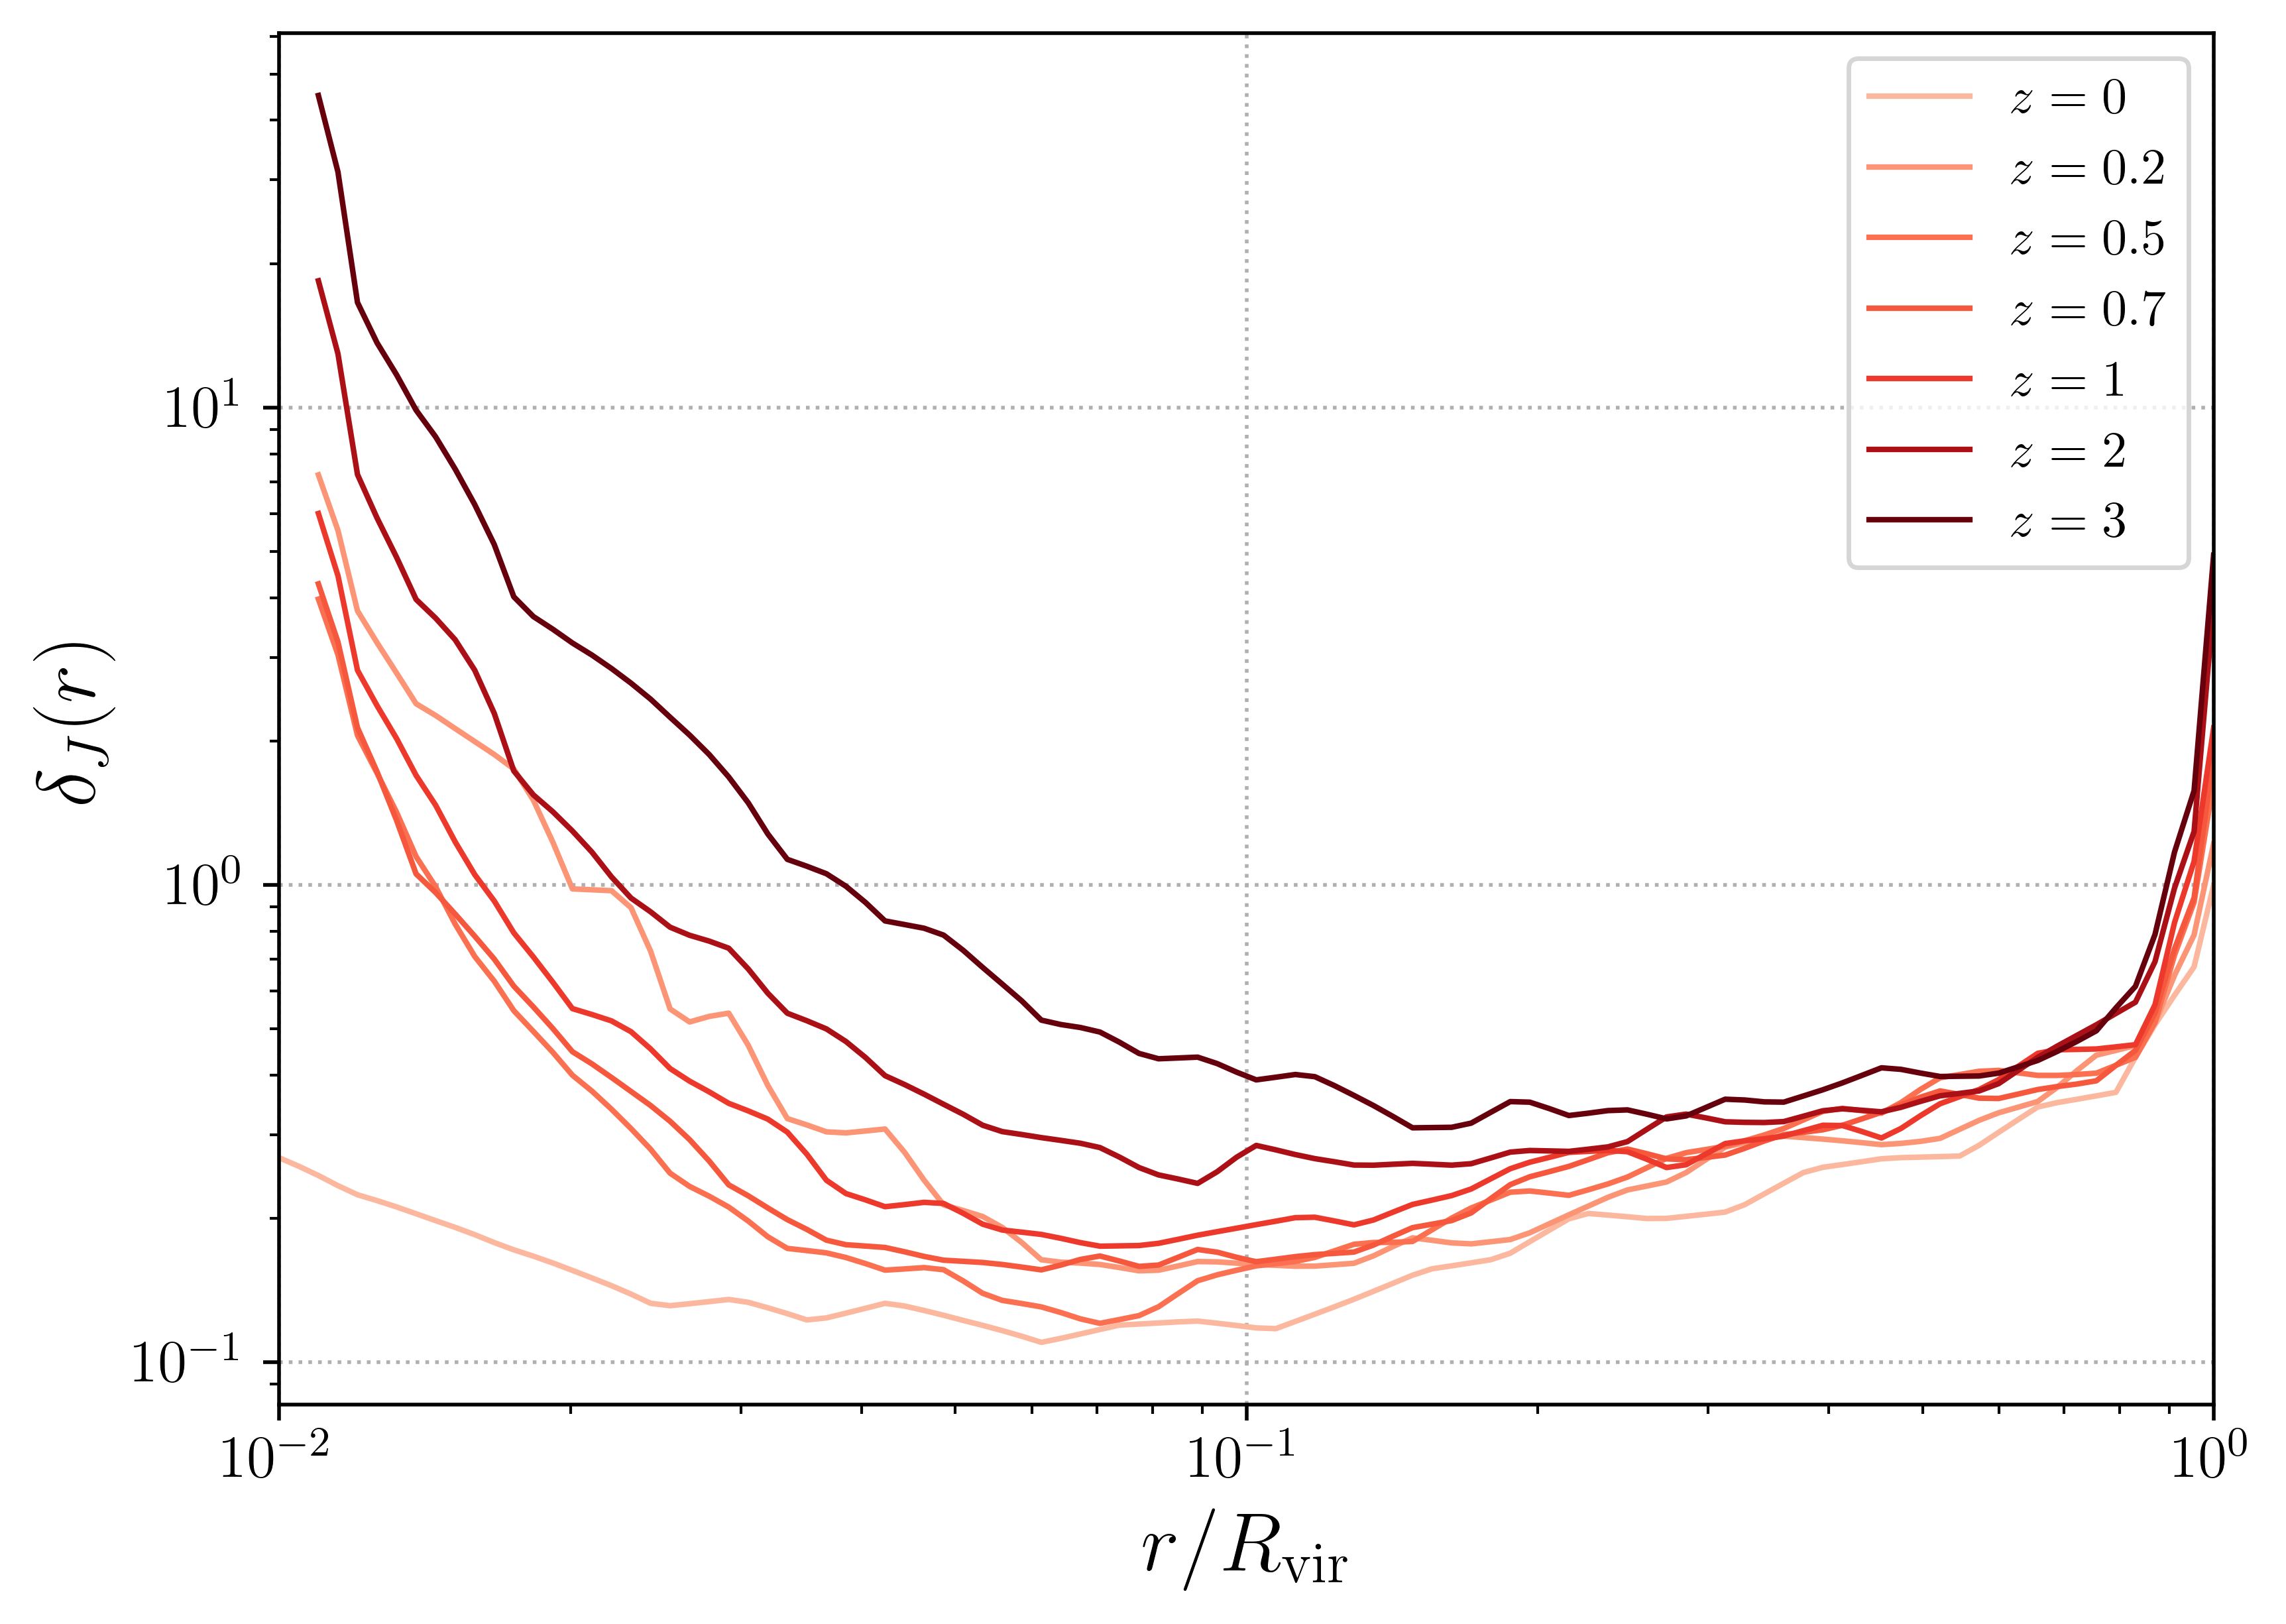

In [61]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import matplotlib.cm as cm

# Parameters
redshifts = [0, 0.2, 0.5, 0.7, 1, 2, 3]
base_dir_root = '/Users/fengbocheng/Projects/Symphony-PPSD/output'
plot_range = [1e-2, 1]

def jeans_deviation_vs_radius_multi():
    plt.rcParams["text.usetex"] = True
    fig, ax = plt.subplots(1, 1, figsize=(7, 5), dpi=500)

    # Define a common radial grid (log-spaced)
    r_common = np.logspace(np.log10(plot_range[0]), np.log10(plot_range[1]), 100)

    # Create a colormap: lighter for low z, darker for high z
    cmap = cm.get_cmap("Reds")  
    norm_redshifts = np.sqrt((np.array(redshifts)+0.2 - min(redshifts)) / (max(redshifts) - min(redshifts)))

    # Loop over redshifts
    for i, z in enumerate(redshifts):
        base_dir = os.path.join(base_dir_root, f"z_{z}")
        all_suites_interp = []  # Store interpolated curves for all suites at this redshift
        color = cmap(norm_redshifts[i])  # Pick color based on normalized redshift

        # Loop over all suites
        for suite in suite_names:
            suite_dir = os.path.join(base_dir, "data", suite, "jeans_deviation")
            if not os.path.isdir(suite_dir):
                continue

            files = sorted([f for f in os.listdir(suite_dir) if f.endswith(".csv")])
            if not files:
                continue

            # Load radius and Jeans deviation for all halos in this suite
            r = pd.read_csv(os.path.join(suite_dir, files[0]))["r_scaled"].values
            jeans_dev = np.array([pd.read_csv(os.path.join(suite_dir, f))["delta_J"].values for f in files])
            jeans_mean = np.nanmean(jeans_dev, axis=0)

            # Interpolate to common radial grid
            f_interp = interp1d(r, jeans_mean, kind="linear", bounds_error=False, fill_value=np.nan)
            jeans_interp = f_interp(r_common)
            all_suites_interp.append(jeans_interp)

        # Compute mean and standard deviation across suites for this redshift
        if all_suites_interp:
            all_suites_interp = np.vstack(all_suites_interp)
            mean_over_suites = np.nanmean(all_suites_interp, axis=0)
            std_over_suites = np.nanstd(all_suites_interp, axis=0)

            # Plot mean with shaded standard deviation
            ax.plot(r_common, mean_over_suites, lw=1.2, color=color, label=rf"$z={z}$")
            #ax.fill_between(r_common, mean_over_suites - std_over_suites, mean_over_suites + std_over_suites, color=color, alpha=0.2)

    # Format axes
    ax.set_xlabel(r"$r / R_{\mathrm{vir}}$", fontsize=18)
    ax.set_ylabel(r"$\delta_J(r)$", fontsize=18)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlim(plot_range)
    ax.legend(fontsize=11, loc="best", frameon=True)
    ax.grid(True, which="major", linestyle=":")
    plt.tick_params(axis='both', labelsize=13)
    fig.tight_layout()
    plt.show()

# Run the function
jeans_deviation_vs_radius_multi()

/var/folders/ws/425czmvd4jn8yf9hxr3xtk880000gn/T/ipykernel_61468/4135745070.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Reds")  # colormap


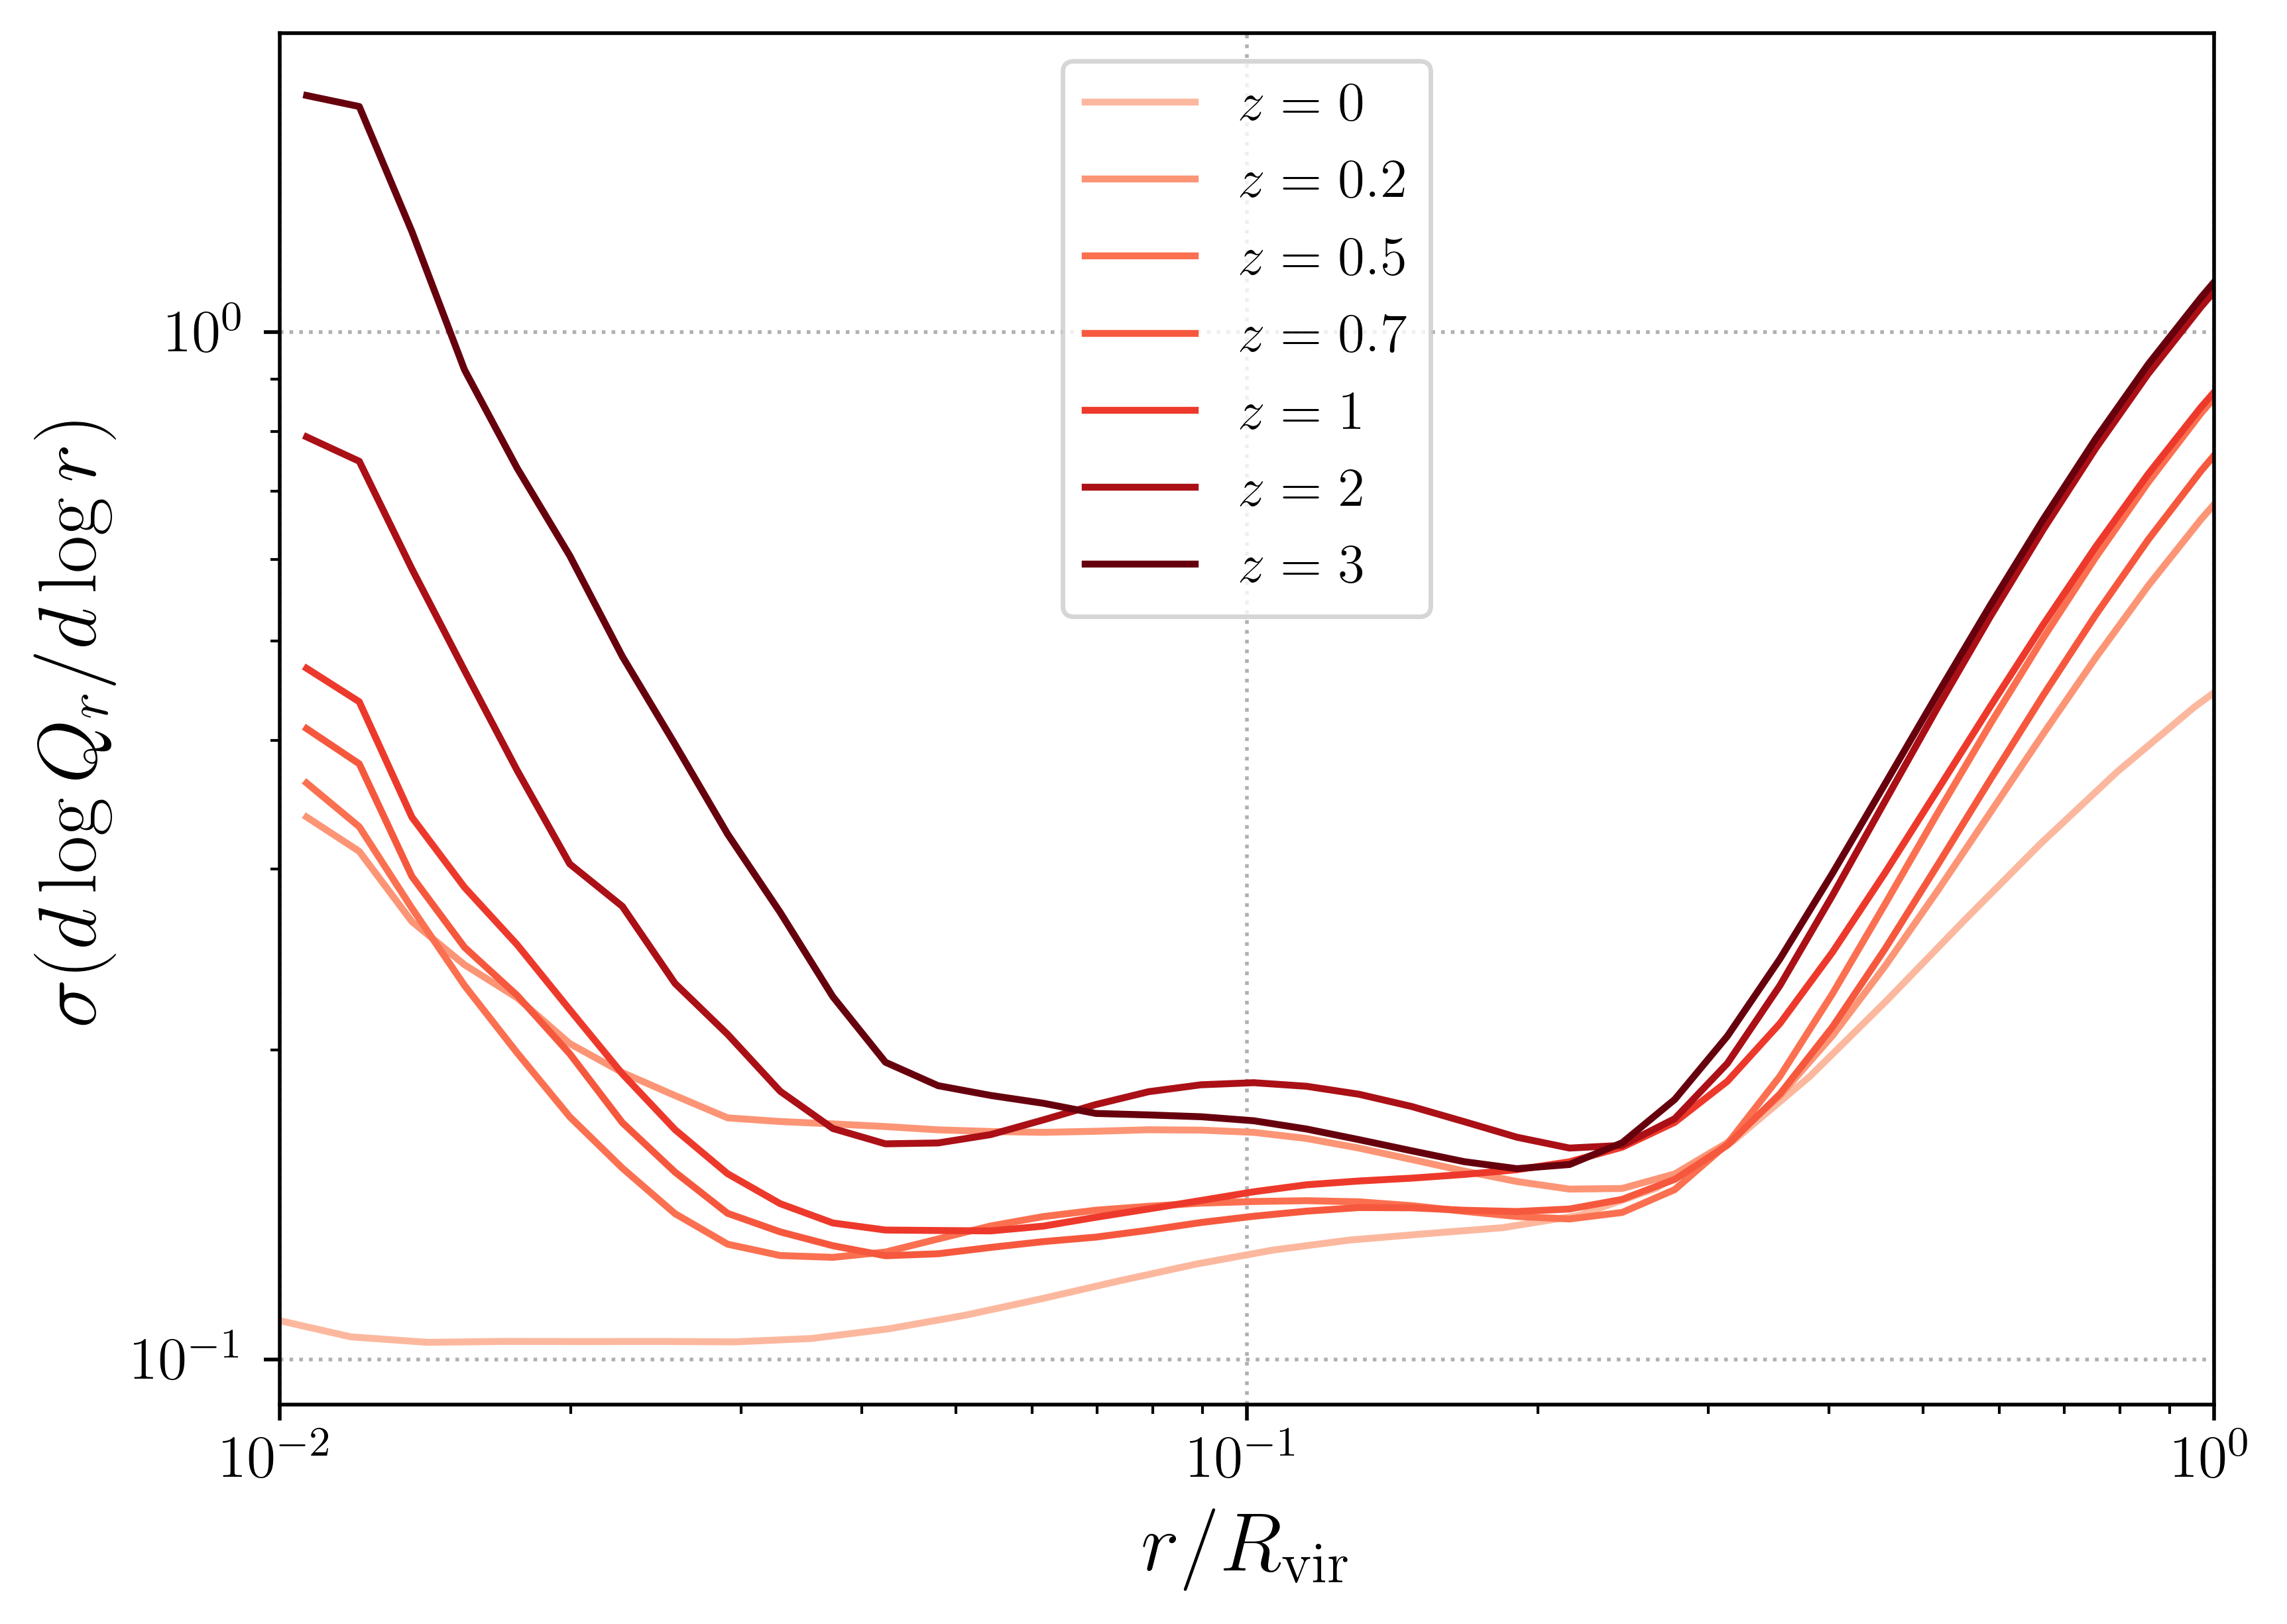

In [60]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Parameters
redshifts = [0, 0.2, 0.5, 0.7, 1, 2, 3]
base_dir_root = '/Users/fengbocheng/Projects/Symphony-PPSD/output'
plot_range = [1e-2, 1]

# Normalize redshifts using sqrt to make low-z colors darker
norm_redshifts = np.sqrt((np.array(redshifts)+0.2 - min(redshifts)) / (max(redshifts) - min(redshifts)))
cmap = cm.get_cmap("Reds")  # colormap

def ppsd_slope_std_vs_redshift_nointerp():
    plt.rcParams["text.usetex"] = True
    fig, ax = plt.subplots(1, 1, figsize=(7, 5), dpi=500)

    for i, z in enumerate(redshifts):
        base_dir = os.path.join(base_dir_root, f"z_{z}")
        all_suites_data = []

        for suite in suite_names:
            radius_dir = os.path.join(base_dir, "data", suite, "ppsd_slope_profiles_r")
            if not os.path.isdir(radius_dir):
                continue

            files = sorted([f for f in os.listdir(radius_dir) if f.endswith(".csv")])
            if not files:
                continue

            # Load slope_Qr for all halos in this suite
            slope_Qr = np.array([pd.read_csv(os.path.join(radius_dir, f))["slope_Q_r"].values for f in files])
            all_suites_data.append(slope_Qr)

            # Assume radius is the same for all halos
            r = pd.read_csv(os.path.join(radius_dir, files[0]))["r_scaled"].values

        if all_suites_data:
            all_suites_data = np.vstack(all_suites_data)
            sigma_r = np.nanstd(all_suites_data, axis=0)

            # Pick color based on sqrt-normalized redshift
            color = cmap(norm_redshifts[i])

            # Plot standard deviation
            ax.plot(r, sigma_r, lw=1.5, color=color, label=rf"$z={z}$")

    # Format axes
    ax.set_xlabel(r"$r / R_{\mathrm{vir}}$", fontsize=18)
    ax.set_ylabel(r"$\sigma(d\log Q_r / d\log r)$", fontsize=18)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlim(plot_range)
    ax.legend(fontsize=12, loc="best", frameon=True)
    ax.grid(True, which="major", linestyle=":")
    plt.tick_params(axis='both', labelsize=13)
    fig.tight_layout()
    plt.show()

# Run
ppsd_slope_std_vs_redshift_nointerp()